<a href="https://colab.research.google.com/github/SadidRomero77/CNN-Astronomic/blob/main/CNN_Objetos_celestes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/galaxias | wc -l #41
!ls /content/planetas | wc -l #46
!ls /content/nebulosas | wc -l #64

41
46
64


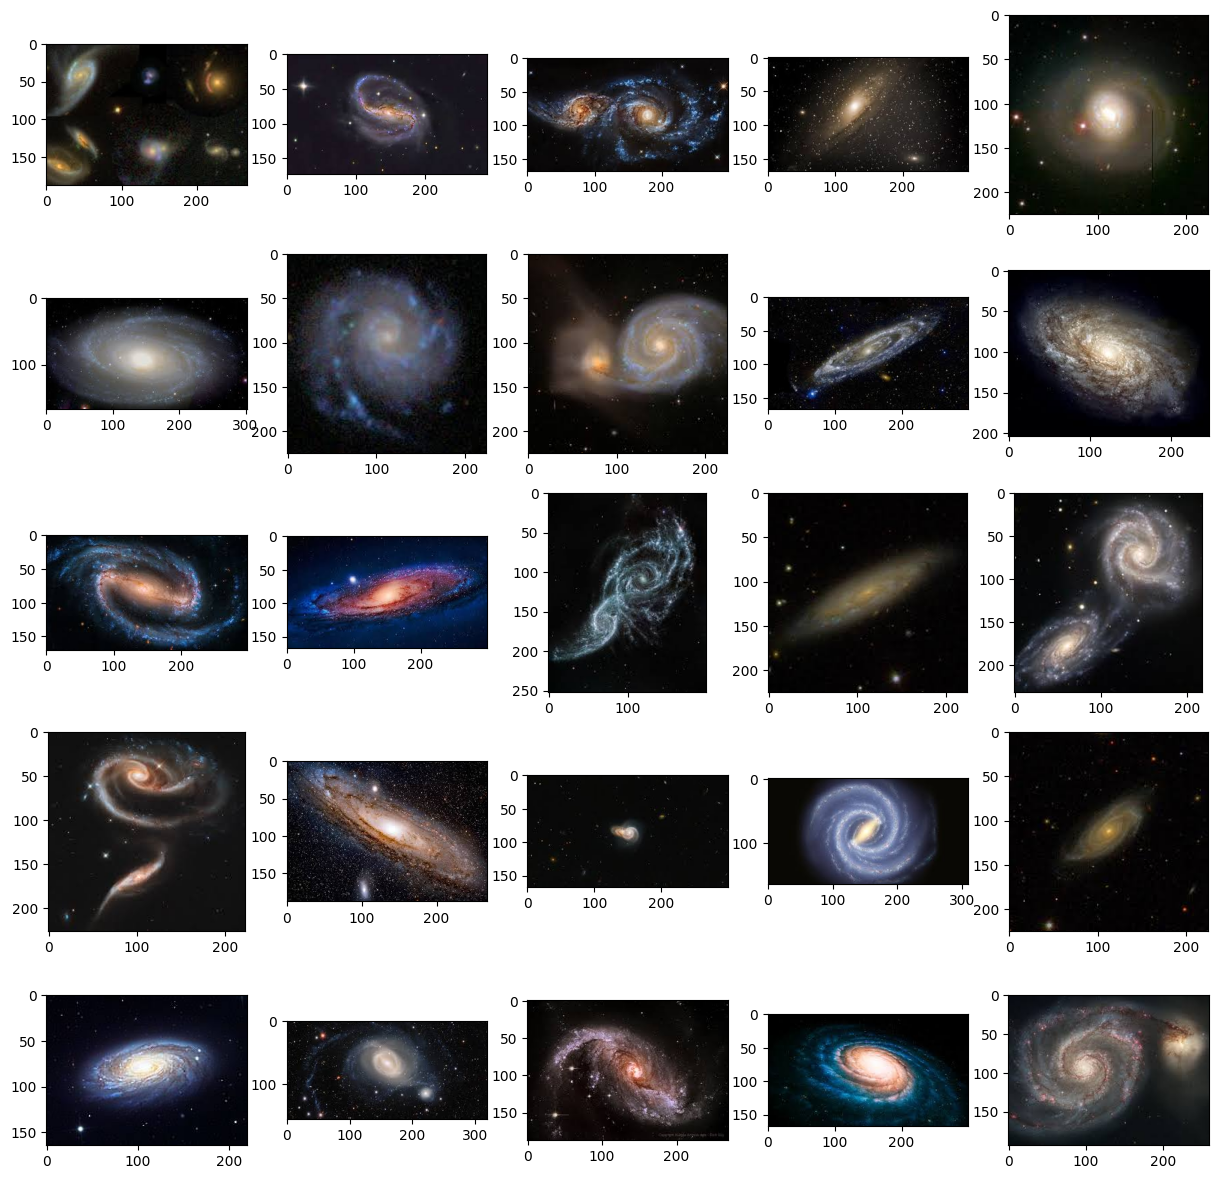

In [3]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/galaxias'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [4]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/galaxia
!mkdir dataset/nebulosa
!mkdir dataset/planeta

In [5]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/galaxias'
carpeta_destino = '/content/dataset/galaxia'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 41:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [6]:
carpeta_fuente = '/content/nebulosas'
carpeta_destino = '/content/dataset/nebulosa'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 41:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [7]:
carpeta_fuente = '/content/planetas'
carpeta_destino = '/content/dataset/planeta'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 41:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/galaxia | wc -l
!ls /content/dataset/planeta | wc -l
!ls /content/dataset/nebulosa | wc -l

41
41
41


Found 99 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


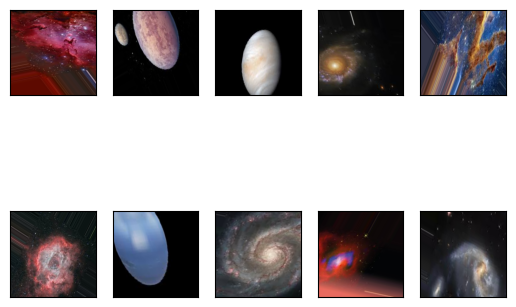

In [9]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [10]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [11]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [12]:
import tensorflow as tf

# Cargar el modelo MobileNetV2 desde Keras Applications
mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar las capas del modelo base
mobilenetv2.trainable = False

# Crear el modelo utilizando la API funcional
inputs = tf.keras.Input(shape=(224, 224, 3))
x = mobilenetv2(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

modelo = tf.keras.Model(inputs, outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3443 - loss: 1.2940 - val_accuracy: 0.2917 - val_loss: 1.4279
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.6269 - loss: 0.9803 - val_accuracy: 0.4167 - val_loss: 1.0464
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5690 - loss: 0.8647 - val_accuracy: 0.5000 - val_loss: 0.9553
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.7416 - loss: 0.6915 - val_accuracy: 0.6667 - val_loss: 0.7740
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8728 - loss: 0.5019 - val_accuracy: 0.8750 - val_loss: 0.6381
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9043 - loss: 0.3586 - val_accuracy: 0.7917 - val_loss: 0.5053
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9078 - loss: 0.3212 - val_accuracy: 0.8333 - val_loss: 0.4455
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9716 - loss: 0.2240 - val_accuracy: 0.8750 - val_loss: 0.4032
Epoch

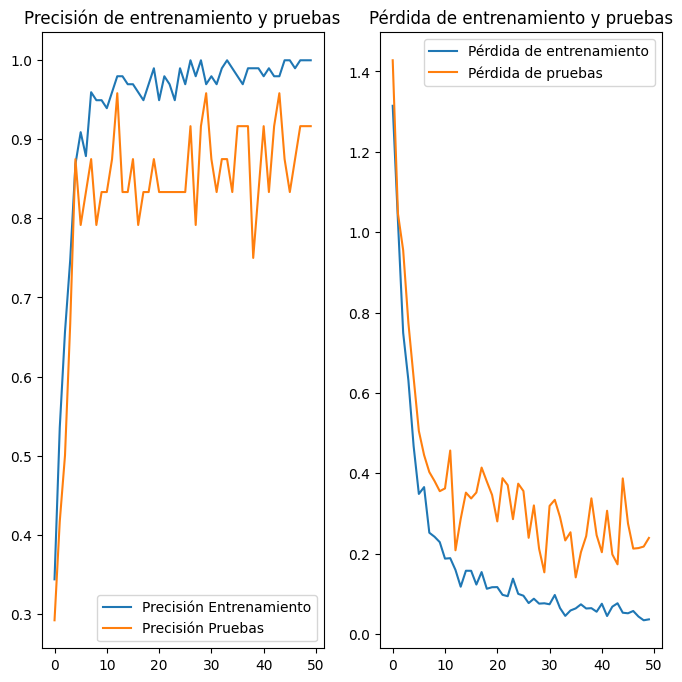

In [16]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [17]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [18]:
#0 = galaxia, 1 = nebulosa, 2 = planeta
url = 'https://static.nationalgeographic.es/files/styles/image_3200/public/04-hubble-heic1307a.jpg?w=1600' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1


In [19]:
pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [20]:
pip install tensorflowjs

In [21]:

import tensorflow as tf
import tensorflowjs as tfjs

# Exportar el modelo a TensorFlow.js
tfjs.converters.save_keras_model(modelo, 'ruta/a/tu/carpeta/modelo')

failed to lookup keras version from the file,
    this is likely a weight only file
